In [1]:
import sys
import torch
from torch import nn
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
sys.path.insert(0, '..')  # Add the parent dir to the system path
%reload_ext autoreload
%autoreload 2
%aimport helper

helper.info()

torch version: 2.3.0
device: cpu


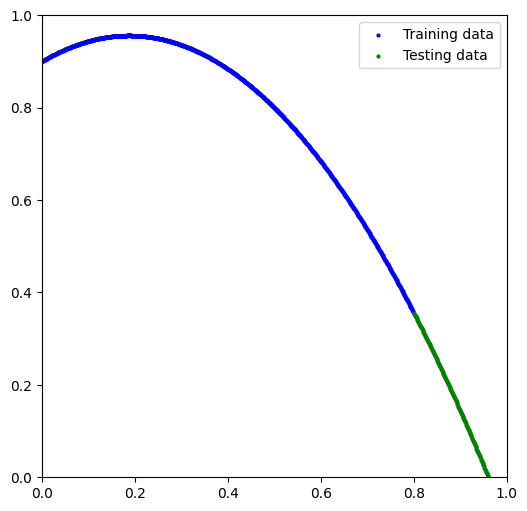

In [3]:
X = torch.arange(0, 1, 0.001).unsqueeze(dim=1)
y = -1.6 * X * X + 0.6 * X + 0.9
# y = 0.5 * X + 0.2

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

helper.plot_predictions(X_train, y_train, X_test, y_test, None)

In [54]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
).to(helper.device)

model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): ReLU()
  (3): Linear(in_features=10, out_features=1, bias=True)
)

In [55]:
torch.manual_seed(42)
model_2 = deepcopy(model)

loss_fn = nn.L1Loss() # MAE
# loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.001)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 2101

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training
    model_2.train()
    y_pred = model_2(X_train)
    # print(y_pred)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # gradient descent (update the parameters)

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      test_pred = model_2(X_test) # forward pass
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            if epoch % 100 == 0:
              print(f"Epoch: {epoch:2d} | Train Loss: {loss:.3f} | Test Loss: {test_loss:.3f} ")

Epoch:  0 | Train Loss: 0.812 | Test Loss: 0.199 
Epoch: 100 | Train Loss: 0.615 | Test Loss: 0.113 
Epoch: 200 | Train Loss: 0.456 | Test Loss: 0.205 
Epoch: 300 | Train Loss: 0.324 | Test Loss: 0.363 
Epoch: 400 | Train Loss: 0.242 | Test Loss: 0.489 
Epoch: 500 | Train Loss: 0.194 | Test Loss: 0.586 
Epoch: 600 | Train Loss: 0.168 | Test Loss: 0.653 
Epoch: 700 | Train Loss: 0.156 | Test Loss: 0.695 
Epoch: 800 | Train Loss: 0.149 | Test Loss: 0.718 
Epoch: 900 | Train Loss: 0.145 | Test Loss: 0.728 
Epoch: 1000 | Train Loss: 0.141 | Test Loss: 0.730 
Epoch: 1100 | Train Loss: 0.138 | Test Loss: 0.728 
Epoch: 1200 | Train Loss: 0.135 | Test Loss: 0.724 
Epoch: 1300 | Train Loss: 0.132 | Test Loss: 0.718 
Epoch: 1400 | Train Loss: 0.129 | Test Loss: 0.711 
Epoch: 1500 | Train Loss: 0.125 | Test Loss: 0.704 
Epoch: 1600 | Train Loss: 0.122 | Test Loss: 0.696 
Epoch: 1700 | Train Loss: 0.118 | Test Loss: 0.688 
Epoch: 1800 | Train Loss: 0.115 | Test Loss: 0.677 
Epoch: 1900 | Train Los

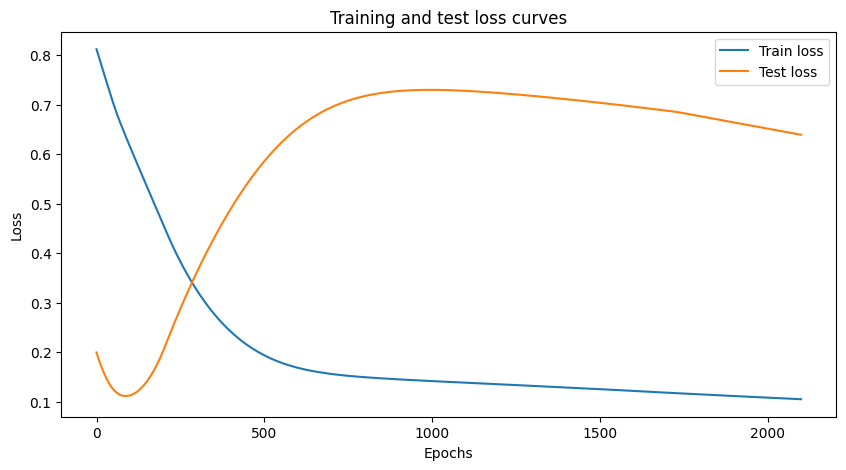

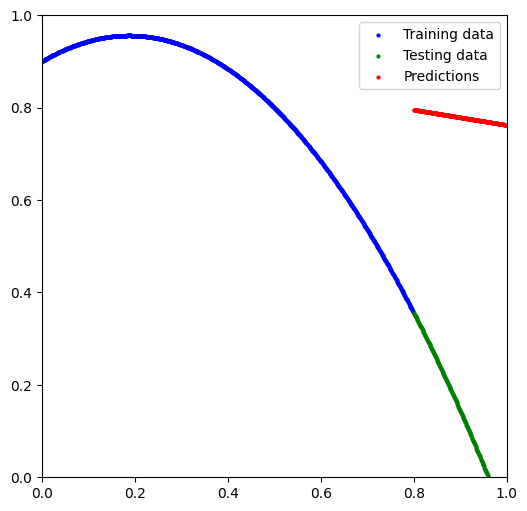

In [56]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

with torch.inference_mode(): 
    y_preds = model_2(X_test)

helper.plot_predictions(X_train, y_train, X_test, y_test, y_preds)